In [25]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd


In [28]:
# Define the sigmoid function
def sigmoid(x, x0, k):
    return 1 / (1 + np.exp(-k * (x - x0)))








# # Define the file path
# file_path = '/path/to/your/excel/file.xlsx'

# # Read the Excel file into a pandas DataFrame
# df = pd.read_excel(file_path)

# # Extract the x and y data from the DataFrame
# xdata_list = [df['xdata1'].values, df['xdata2'].values, ...]
# ydata_list = [df['ydata1'].values, df['ydata2'].values, ...]

# num_datasets = len(xdata_list)


# Define the x and y data for each dataset
xdata_list = [
    np.array([0.0, 1.0, 3.0, 4.3, 7.0, 8.0, 8.5, 10.0, 12.0]),
    np.array([0.5, 2.0, 3.5, 5.0, 6.5, 7.5, 9.0, 10.5, 11.5])
]
ydata_list = [
    np.array([0.01, 0.02, 0.04, 0.11, 0.43, 0.7, 0.89, 0.95, 0.99]),
    np.array([0.02, 0.03, 0.05, 0.15, 0.5, 0.75, 0.88, 0.94, 0.98])
]

xdata_list.append(np.array([1.5, 3.0, 4.5, 6.0, 7.5, 9.0, 10.5, 12.0]))
ydata_list.append(np.array([0.03, 0.06, 0.09, 0.18, 0.35, 0.6, 0.8, 0.95]))

xdata_list.append(np.array([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0]))
ydata_list.append(np.array([0.01, 0.04, 0.16, 0.36, 0.64, 0.84, 0.98]))

xdata_list.append(np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]))
ydata_list.append(np.array([0.01, 0.03, 0.06, 0.1, 0.15, 0.21, 0.28, 0.36, 0.45, 0.55, 0.66, 0.78, 0.91]))

xdata_list.append(np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]))
ydata_list.append(np.array([0.0, 0.02, 0.05, 0.1, 0.17, 0.26, 0.37, 0.5, 0.65, 0.8, 0.9, 0.95, 0.99]))

num_datasets = len(xdata_list)


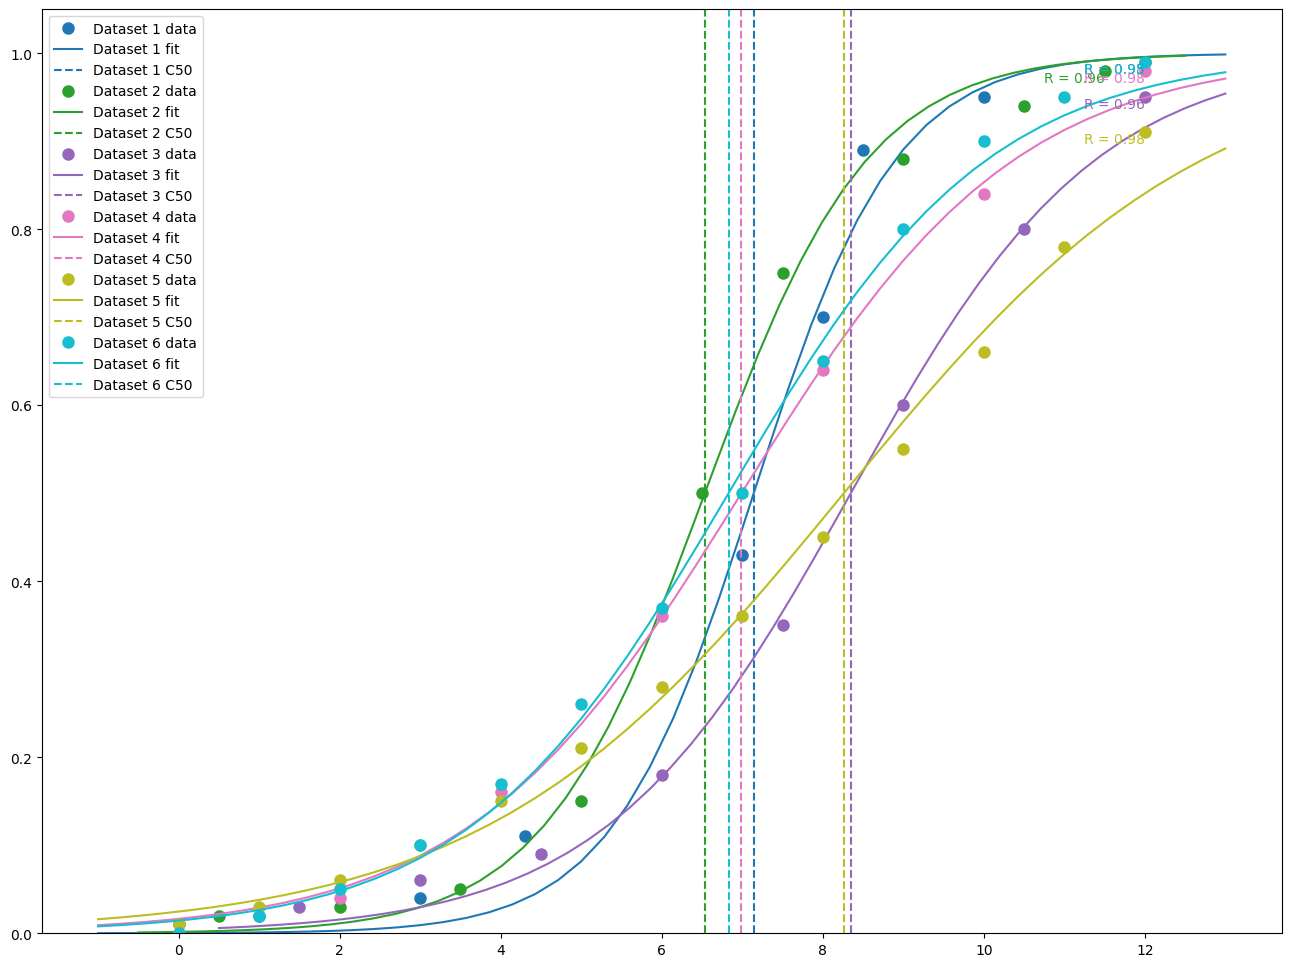

In [42]:
# Get a color map for the datasets
colors = plt.get_cmap('tab10', num_datasets)
popt_list = []

# Create a new figure with a larger size
plt.figure(figsize=(16, 12))


# Plot each dataset
for i, (xdata, ydata) in enumerate(zip(xdata_list, ydata_list)):
    # Fit the sigmoid function to the data
    popt, pcov = curve_fit(sigmoid, xdata, ydata)
    popt_list.append(popt)

    # Generate x values for the sigmoid curve
    x = np.linspace(min(xdata)-1, max(xdata)+1, 50)
    
    # Calculate y values using the fitted parameters
    y = sigmoid(x, *popt)

    # Get the color for the current dataset
    color = colors(i)

    # Plot the data points
    plt.plot(xdata, ydata, 'o', label=f'Dataset {i+1} data', markersize=8, color=color)
    
    # Plot the fitted sigmoid curve
    plt.plot(x, y, label=f'Dataset {i+1} fit', color=color)

    # Plot a vertical line at the x-coordinate of the sigmoid's inflection point (C50)
    x0 = popt[0]
    plt.axvline(x=x0, color=color, linestyle='--', label=f'Dataset {i+1} C50')

    # Calculate the correlation coefficient (R-value)
    R = np.corrcoef(xdata, ydata)[0, 1]
    
    # Add the R-value as text to the plot
    plt.text(max(xdata), max(ydata), f'R = {R:.2f}', ha='right', va='top', color=color)

# Set the y-axis limits
plt.ylim(0, 1.05)

# Add a legend
plt.legend()

# Show the plot
plt.show()


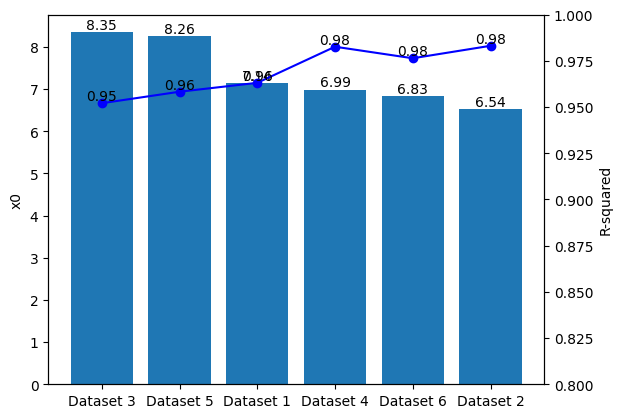

In [53]:
# Get the x0 values for each dataset
x0_values = [popt[0] for popt in popt_list]
# Sort the x0 values in descending order
sorted_indices = sorted(range(num_datasets), key=lambda i: x0_values[i], reverse=True)
sorted_x0_values = [x0_values[i] for i in sorted_indices]



# Create a bar plot with sorted x0 values
fig, ax1 = plt.subplots()
ax1.bar(range(num_datasets), sorted_x0_values)

# Set the x-axis tick labels based on the sorted indices
ax1.set_xticks(range(num_datasets))
ax1.set_xticklabels([f'Dataset {i+1}' for i in sorted_indices])

# Set the y-axis label for x0 values
ax1.set_ylabel('x0')

# # Highlight Dataset 4 by setting a different color
# highlight_color = 'red'
# ax1.bar(sorted_indices[3], sorted_x0_values[3], color=highlight_color)

# Add data labels to the top of each bar
for i, x0_value in enumerate(sorted_x0_values):
    ax1.text(i, x0_value, f'{x0_value:.2f}', ha='center', va='bottom')

# Calculate the R-values for each dataset
R_values = [np.corrcoef(xdata_list[i], ydata_list[i])[0, 1] for i in range(num_datasets)]


# Create a secondary y-axis for R-squared values
ax2 = ax1.twinx()

# Plot the R-values as a line graph
ax2.plot(range(num_datasets), R_values, marker='o', linestyle='-', color='blue')

# Set the minimum and maximum values for the secondary y-axis
ax2.set_ylim(0.80, 1)

# Add data labels to the top of each data point
for i, R_value in enumerate(R_values):
    ax2.text(i, R_value, f'{R_value:.2f}', ha='center', va='bottom')

# Set the y-axis label for R-squared values
ax2.set_ylabel('R-squared')

# Show the plot
plt.show()
